# Final Project - Kalkulator Pajak - Thailand (THB)

## Perkenalan
Tim :
- Gede Aldi Vyacta Pranayena Sudirga
- Mesayu Puspita
- Muhammad Amri Hakim
- Vania Alya Qonita

Objektif : Prediksi Nilai Kurs dalam Kalkulator Bea Cukai untuk Menghitung Biaya Pajak Barang Pengiriman ke Indonesia.

## Import Libraries

In [1]:
# Melakukan import libraries yang akan digunakan
import pandas as pd
import numpy as np
# Library untuk visualisasi data
import matplotlib.pyplot as plt
import seaborn as sns
# Library untuk korelasi
from scipy import stats
# Library untuk model saving
import pickle
# Library untuk evaluasi
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt
# Library untuk handling warning
import warnings
warnings.filterwarnings('ignore')

## Data Loading

In [2]:
# Melakukan loading data currency
df_thb = pd.read_csv('THB-2001.csv')
# Menampilkan hasil data
df_thb

,Date,Close
0,1/2/2001 23:58:00,216.680011
1,1/3/2001 23:58:00,218.265359
2,1/4/2001 23:58:00,217.767019
3,1/5/2001 23:58:00,219.481117
4,1/8/2001 23:58:00,220.900392
...,...,...
7987,5/1/2024 23:58:00,438.076500
7988,5/2/2024 23:58:00,437.751400
7989,5/3/2024 23:58:00,434.716900
7990,5/4/2024 23:58:00,439.074100


In [ ]:
# Menampilkan 10 data awal tabel dengan head
df_thb.head(10)

,Date,Close
0,1/2/2001 23:58:00,216.680011
1,1/3/2001 23:58:00,218.265359
2,1/4/2001 23:58:00,217.767019
3,1/5/2001 23:58:00,219.481117
4,1/8/2001 23:58:00,220.900392
5,1/9/2001 23:58:00,220.427606
6,1/10/2001 23:58:00,220.519957
7,1/11/2001 23:58:00,220.994467
8,1/12/2001 23:58:00,221.310527
9,1/15/2001 23:58:00,218.078958


In [ ]:
# Menampilkan 10 data akhir data menggunakan tail
df_thb.tail(10)

,Date,Close
7982,4/26/2024 23:58:00,439.2360
7983,4/27/2024 23:58:00,439.2360
7984,4/28/2024 23:58:00,437.9838
7985,4/29/2024 23:58:00,439.0359
7986,4/30/2024 23:58:00,437.3783
7987,5/1/2024 23:58:00,438.0765
7988,5/2/2024 23:58:00,437.7514
7989,5/3/2024 23:58:00,434.7169
7990,5/4/2024 23:58:00,439.0741
7991,5/5/2024 23:58:00,438.1487


## Exploratory Data Analysis

### Data Understanding

In [ ]:
# Melihat kolom yang tersedia
df_thb.columns

Index(['Date', 'Close'], dtype='object')

In [ ]:
# Melihat tipe data yang tersedia
df_thb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7992 entries, 0 to 7991
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    7992 non-null   object 
 1   Close   7992 non-null   float64
dtypes: float64(1), object(1)
memory usage: 125.0+ KB


In [ ]:
# Melihat jumlah data yang tersedia
df_thb.shape

(7992, 2)

In [ ]:
# Mengecek central tendency menggunakan describe
df_thb.describe()

,Close
count,7992.000000
mean,339.046751
std,84.093806
min,30.044570
25%,277.422106
50%,324.309070
75%,426.364875
max,508.410900


In [ ]:
# Mengecek duplikasi pada data
df_thb.duplicated().value_counts()

False    7992
Name: count, dtype: int64

In [ ]:
# Mengecek nilai null
df_thb.isnull().sum()

Date     0
Close    0
dtype: int64

### Data Visualization

Text(0, 0.5, 'Currency Price')

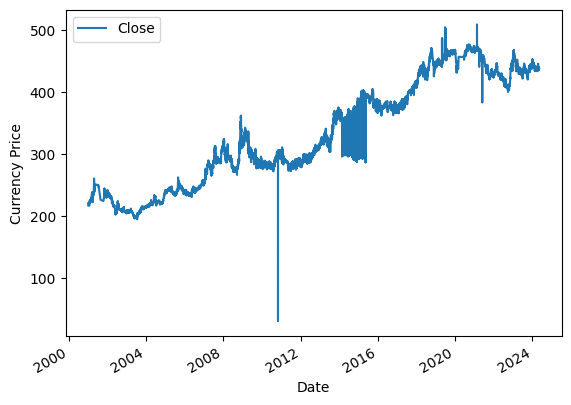

In [3]:
# Plot the data

df_thb.columns = ['Date', 'Close']
df_thb.Date = pd.to_datetime(df_thb.Date)
df_thb.set_index('Date',inplace=True)
df_thb.plot()
plt.xlabel('Date')
plt.ylabel('Currency Price')

## Feature Engineering


In [24]:
#splitting train and test
train=df_thb[:6000]
test=df_thb[6000:]

## Model Definition & Training

### Moving Average

In [25]:
# Membuat hasil prediksi dengan rolling window 12 hari
predictions = []

window_size = 12
for i in range(len(test)):
    if i < window_size:
        moving_avg = train['Close'].mean()
    else:
        moving_avg = train['Close'].iloc[-window_size:].mean()

    predictions.append(moving_avg)

    train = pd.concat([train, test.iloc[[i]]], ignore_index=True)

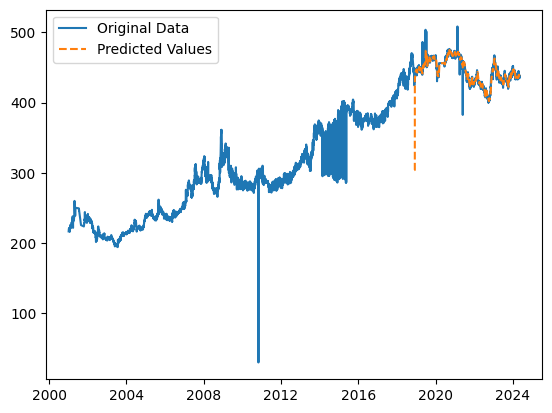

In [26]:
# Melakukan visualisasi plot data
plt.plot(df_thb['Close'], label='Original Data')
plt.plot(test.index, predictions, label='Predicted Values', linestyle='--')
plt.legend()
plt.show()

In [27]:
mae = mean_absolute_error(test.Close, predictions)
rmse = sqrt(mean_squared_error(test.Close, predictions))

# Menampilkan hasil
print("MAE:", mae)
print("RMSE:", rmse)

MAE: 3.793494470026168
RMSE: 11.39217715009043


### ARIMA

In [5]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.arima.model import ARIMA

#### Checking Stationary

In [60]:
# Create a function to check stationarity

def check_stationarity(series):
    # Copied from https://machinelearningmastery.com/time-series-data-stationary-python/

    result = adfuller(series.values)

    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

    if (result[1] <= 0.05) & (result[4]['5%'] > result[0]):
        print("\u001b[32mStationary\u001b[0m")
    else:
        print("\x1b[31mNon-stationary\x1b[0m")

In [61]:
# Check stationarity of the dataset

check_stationarity(df_thb['Close'])

ADF Statistic: -0.982736
p-value: 0.759509
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567
Non-stationary


In [62]:
# Check stationarity after performing first-order differencing

print("1st order differencing")
check_stationarity(df_thb['Close'].diff().dropna())

1st order differencing
ADF Statistic: -15.534516
p-value: 0.000000
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567
Stationary


#### ACF & PACF

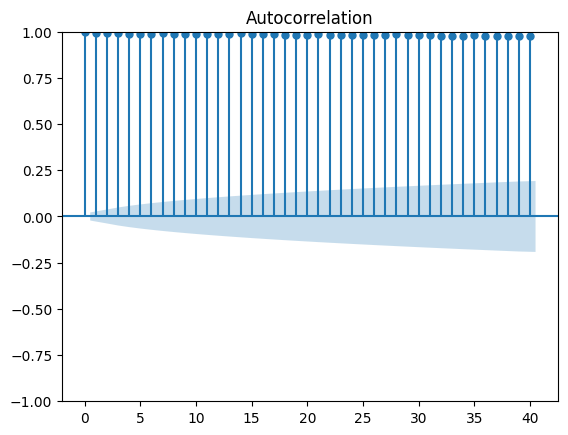

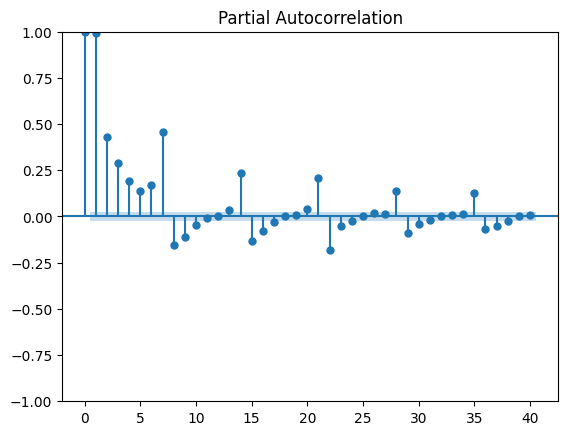

In [5]:
# Plot ACF & PACF from the original dataset

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(df_thb['Close'])
plot_pacf(df_thb['Close'])
plt.show()

Dari hasil plot, dapat terlihat bahwa rekomendasi untuk pembuatan model ARIMA adalah sebagai berikut.
- q = 0 (dikarenakan terjadi tail off)
- d = 0/1 (dikarenakan data stasioner pada diferensiasi 1)
- p = 1,2,3,4,5,6,7,8,9,14,15,16,21,22,28,29

Dari beberapa pilihan tersebut, kita akan lakukan pencarian model ARIMA terbaik.

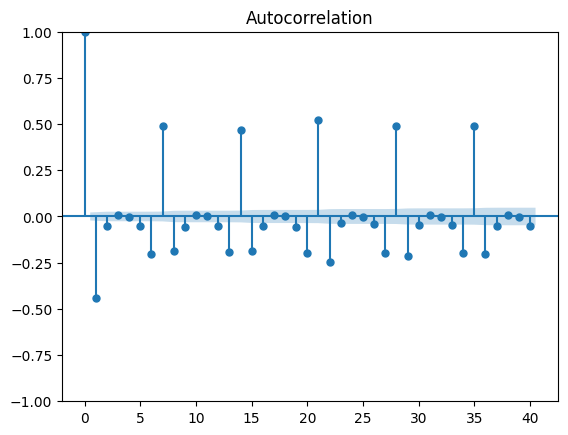

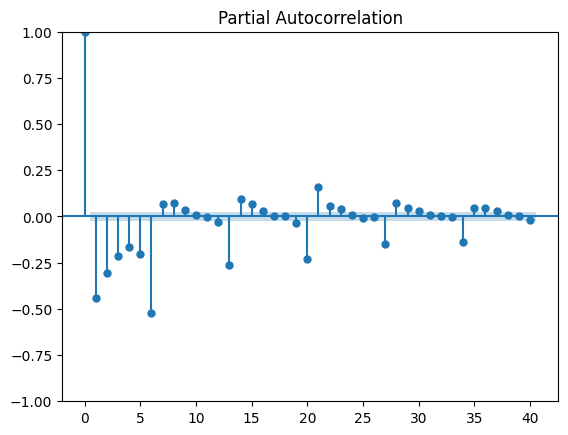

In [6]:
# Plot ACF & PACF from the original dataset

plot_acf(df_thb['Close'].diff().dropna())
plot_pacf(df_thb['Close'].diff().dropna())
plt.show()

#### ARIMA Model

In [63]:
# Create a function to find best model

def find_best_model(data, num_p, num_d, num_q):
  df = pd.DataFrame() #We make a pandas dataframe to ease our work, you can use any way that makes you comfortable and work easly
  pdq = [[],[],[]] #This list for storing the combinations of p and q
  aic = [] # This list for storing aic value
  for p in range(num_p + 1): #plus one is to make the range up to num_p since python range only ranging from 0 to N-1
    for d in range(num_d + 1):
      for q in range(num_q + 1):
        # #if p!=0 and q!=0: #this logic will avoid (0,0) value which is not correct
        try: #Using exception to avoid the error while training the model with certain p and q value
          model = ARIMA(data, order=(p, d, q))
          result = model.fit()
          pdq[0].append(p)
          pdq[1].append(d)
          pdq[2].append(q)
          aic.append(result.aic)
        except:
          pass #If there is an error caused by the calculation, it will be skipped to the next iteration

  df['p'] = pdq[0]
  df['d'] = pdq[1]
  df['q'] = pdq[2]
  df['AIC'] = aic

  df.sort_values('AIC', inplace=True)

  return df.p.iloc[0], df.d.iloc[0], df.q.iloc[0], df.AIC.iloc[0], df

In [ ]:
# Find best model of ARIMA with combinations of p=29, d=1, q=0

%%time
find_best_model(df_thb['Close'], 29, 1, 0)

CPU times: user 30min 30s, sys: 19min 54s, total: 50min 24s
Wall time: 30min 10s


(29,
 1,
 0,
 52954.22472575883,
      p  d  q           AIC
 59  29  1  0  52954.224726
 57  28  1  0  52967.838170
 58  29  0  0  52983.803862
 55  27  1  0  53009.782296
 56  28  0  0  53025.877092
 47  23  1  0  53177.524294
 49  24  1  0  53178.756360
 51  25  1  0  53180.258022
 53  26  1  0  53182.214038
 45  22  1  0  53187.694238
 48  24  0  0  53193.365106
 50  25  0  0  53194.574480
 52  26  0  0  53196.099787
 54  27  0  0  53198.059368
 46  23  0  0  53203.616506
 43  21  1  0  53212.653880
 44  22  0  0  53228.682901
 41  20  1  0  53417.791325
 42  21  0  0  53434.103903
 39  19  1  0  53856.407681
 33  16  1  0  53859.796349
 35  17  1  0  53861.595615
 37  18  1  0  53863.591965
 31  15  1  0  53865.816710
 40  20  0  0  53872.331452
 34  17  0  0  53875.686814
 36  18  0  0  53877.469569
 38  19  0  0  53879.457424
 32  16  0  0  53881.779612
 29  14  1  0  53900.457141
 30  15  0  0  53916.554075
 27  13  1  0  53971.580808
 28  14  0  0  53987.847930
 25  12  1  0  

Dari hasil, kita dapat melihat bahwa model terbaik dengan kombinasi
- p = 29
- d = 1
- q = 0

Kita akan gunakan kombinasi ini untuk membuat model ARIMA.

In [6]:
# Train ARIMA with best combinations

model_arima_2910 = ARIMA(df_thb['Close'], order=(29, 1, 0))
result_model_arima_2910 = model_arima_2910.fit()

print('The AIC is ', result_model_arima_2910.aic)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


The AIC is  52954.22472575883


In [7]:
# Prediksi model pada data
new_pred1 = result_model_arima_2910.predict(start="2001-01-02", end="2024-05-04", dynamic=False)
new_pred1 = pd.DataFrame(new_pred1)
new_pred1.columns = ['Close_predict']

all_dataset_with_pred1 = pd.concat([df_thb, new_pred1], axis=1)
all_dataset_with_pred1

,Close,Close_predict
Date,,
2001-01-02 23:58:00,216.680011,0.000000
2001-01-03 23:58:00,218.265359,216.669001
2001-01-04 23:58:00,217.767019,217.557097
2001-01-05 23:58:00,219.481117,217.564613
2001-01-08 23:58:00,220.900392,218.247937
...,...,...
2024-05-01 23:58:00,438.076500,438.232970
2024-05-02 23:58:00,437.751400,438.646319
2024-05-03 23:58:00,434.716900,438.475433


In [8]:
# Melakukan forecasting pada data
len_dataset = df_thb.shape[0]
len_predict = len_dataset + 12


new_pred = result_model_arima_2910.predict(len_dataset, len_predict)
new_pred = pd.DataFrame(new_pred)
new_pred.columns = ['Close_forecast']

last_date = df_thb.index.max()
date_range = pd.date_range(start=last_date, periods=13)
new_pred.index = date_range

# Menggabungkan prediksi dengan dataset asli
all_dataset_with_pred = pd.concat([all_dataset_with_pred1, new_pred], axis=1)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [9]:
all_dataset_with_pred

,Close,Close_predict,Close_forecast
2001-01-02 23:58:00,216.680011,0.000000,NaN
2001-01-03 23:58:00,218.265359,216.669001,NaN
2001-01-04 23:58:00,217.767019,217.557097,NaN
2001-01-05 23:58:00,219.481117,217.564613,NaN
2001-01-08 23:58:00,220.900392,218.247937,NaN
...,...,...,...
2024-05-13 23:58:00,NaN,NaN,438.948737
2024-05-14 23:58:00,NaN,NaN,438.204015
2024-05-15 23:58:00,NaN,NaN,437.873827
2024-05-16 23:58:00,NaN,NaN,437.429914


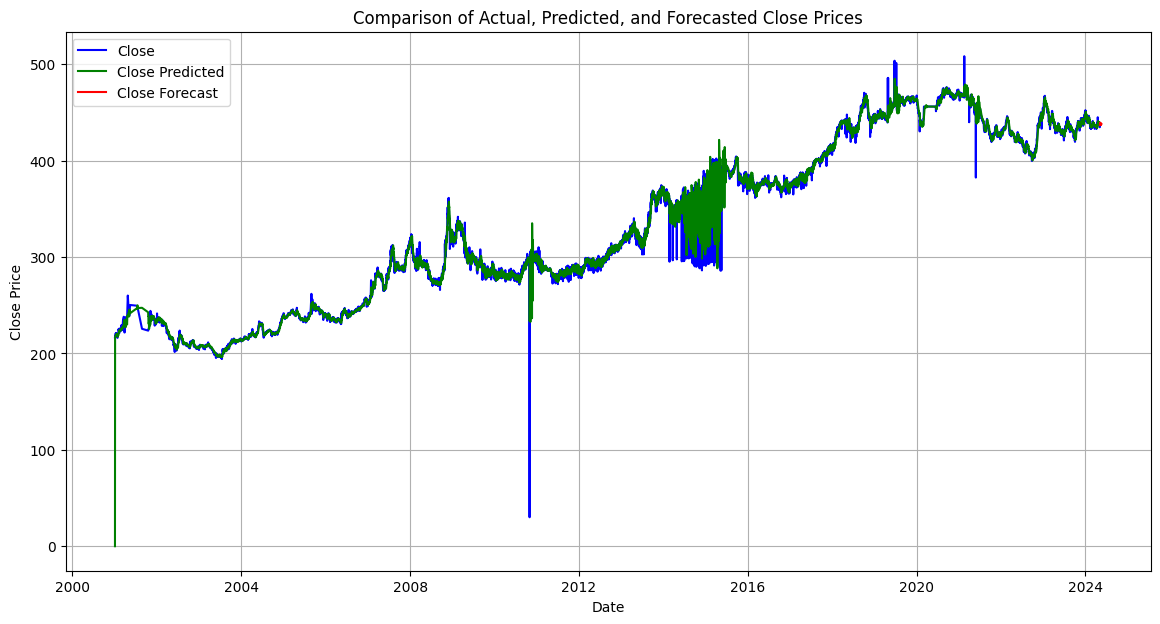

In [113]:
# Melakukan visualisasi data
plt.figure(figsize=(14, 7))
plt.plot(all_dataset_with_pred.index, all_dataset_with_pred['Close'], label='Close', color='blue', linestyle='-')  # Data asli
plt.plot(all_dataset_with_pred.index, all_dataset_with_pred['Close_predict'], label='Close Predicted', color='green', linestyle='-')  # Data prediksi
plt.plot(all_dataset_with_pred.index, all_dataset_with_pred['Close_forecast'], label='Close Forecast', color='red', linestyle='-')  # Data forecast

plt.title('Comparison of Actual, Predicted, and Forecasted Close Prices')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()

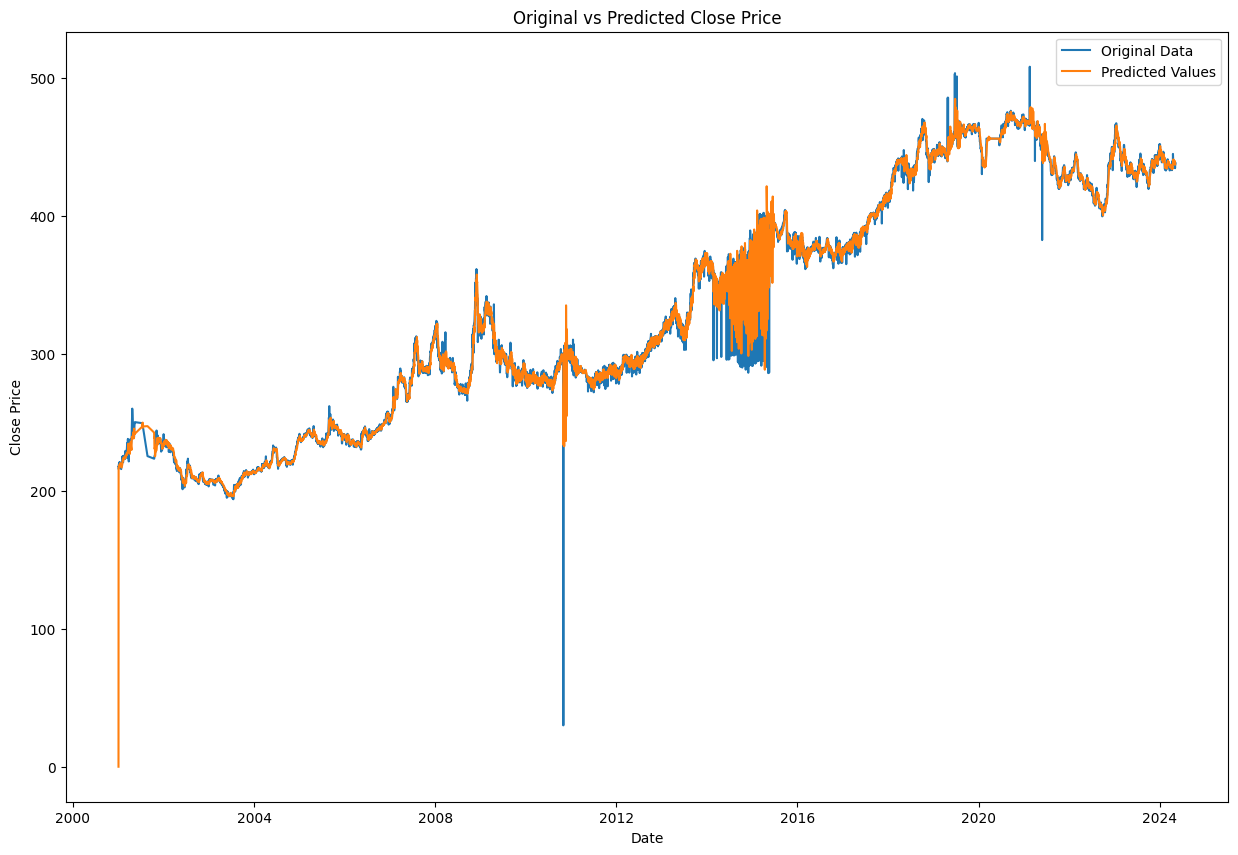

In [12]:
plt.figure(figsize=(15, 10))
plt.plot(df_thb.index, df_thb['Close'], label='Original Data')


# Plot predicted values overlapping the original data
plt.plot(all_dataset_with_pred.index, all_dataset_with_pred['Close_predict'], label='Predicted Values', linestyle='-')

plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Original vs Predicted Close Price')
plt.legend()
plt.show()

### Regression

#### Creating Dataset
Data akan menggunakan lag untuk menjadi fitur. Lag yang digunakan rekomendasi berada pada kisaran 3-6 lag.

In [55]:
# Membuat dataset menggunakan lag
df_reg = df_thb.copy()
df_reg = df_reg.drop(['Close'], axis=1)
df_reg['lag_5'] = df_thb['Close'].shift(5)
df_reg['lag_4'] = df_thb['Close'].shift(4)
df_reg['lag_3'] = df_thb['Close'].shift(3)
df_reg['lag_2'] = df_thb['Close'].shift(2)
df_reg['lag_1'] = df_thb['Close'].shift(1)
df_reg['y'] = df_thb['Close']

# Menampilkan dataset
df_reg

,lag_5,lag_4,lag_3,lag_2,lag_1,y
Date,,,,,,
2001-01-02 23:58:00,NaN,NaN,NaN,NaN,NaN,216.680011
2001-01-03 23:58:00,NaN,NaN,NaN,NaN,216.680011,218.265359
2001-01-04 23:58:00,NaN,NaN,NaN,216.680011,218.265359,217.767019
2001-01-05 23:58:00,NaN,NaN,216.680011,218.265359,217.767019,219.481117
2001-01-08 23:58:00,NaN,216.680011,218.265359,217.767019,219.481117,220.900392
...,...,...,...,...,...,...
2024-05-01 23:58:00,439.2360,439.236000,437.983800,439.035900,437.378300,438.076500
2024-05-02 23:58:00,439.2360,437.983800,439.035900,437.378300,438.076500,437.751400
2024-05-03 23:58:00,437.9838,439.035900,437.378300,438.076500,437.751400,434.716900


#### Cleaning Data

In [56]:
# Melakukan pengecekan nilai null pada dataset
df_reg.isnull().sum()

lag_5    5
lag_4    4
lag_3    3
lag_2    2
lag_1    1
y        0
dtype: int64

In [57]:
# Melakukan dropping nilai null pada data
df_reg.dropna(inplace=True)

# Mengecek hasil dropping nilai null
df_reg.isnull().sum()

lag_5    0
lag_4    0
lag_3    0
lag_2    0
lag_1    0
y        0
dtype: int64

#### Visualizations

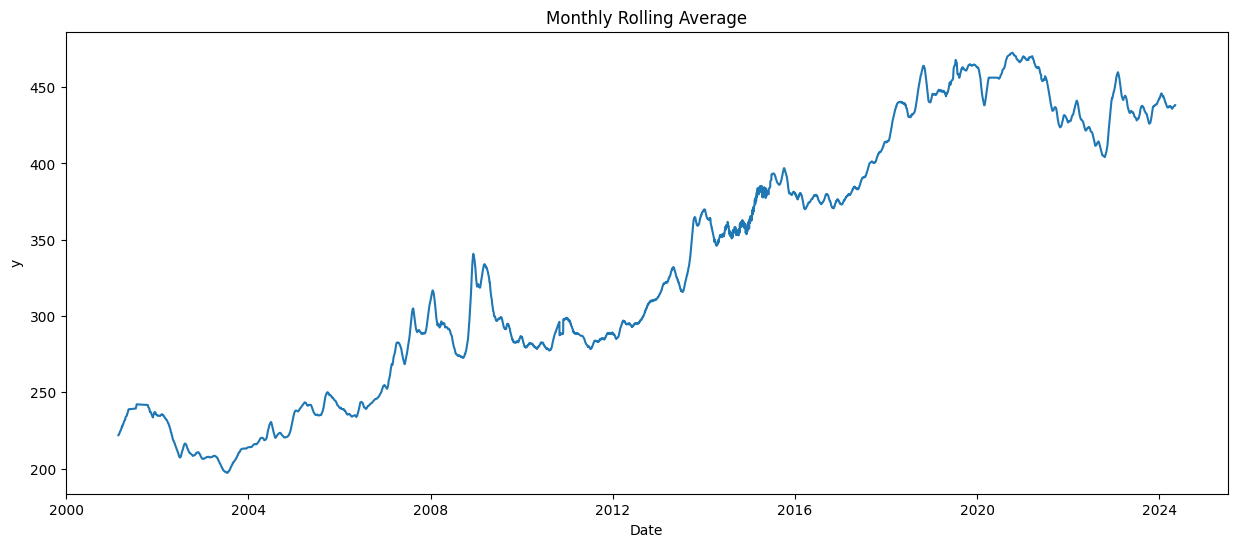

In [36]:
# Membuat visualisasi rolling per bulan
fig, ax = plt.subplots(figsize=(15, 6))
sns.lineplot(x = df_reg.index, y = df_reg["y"].rolling(30).mean(), data = df_reg, ax=ax)
ax.set_title("Monthly Rolling Average");

In [37]:
# Mengecek korelasi
df_reg.corr()

,lag_5,lag_4,lag_3,lag_2,lag_1,y
lag_5,1.000000,0.991838,0.990898,0.990799,0.990546,0.990335
lag_4,0.991838,1.000000,0.991837,0.990897,0.990799,0.990545
lag_3,0.990898,0.991837,1.000000,0.991836,0.990896,0.990798
lag_2,0.990799,0.990897,0.991836,1.000000,0.991835,0.990896
lag_1,0.990546,0.990799,0.990896,0.991835,1.000000,0.991835
y,0.990335,0.990545,0.990798,0.990896,0.991835,1.000000


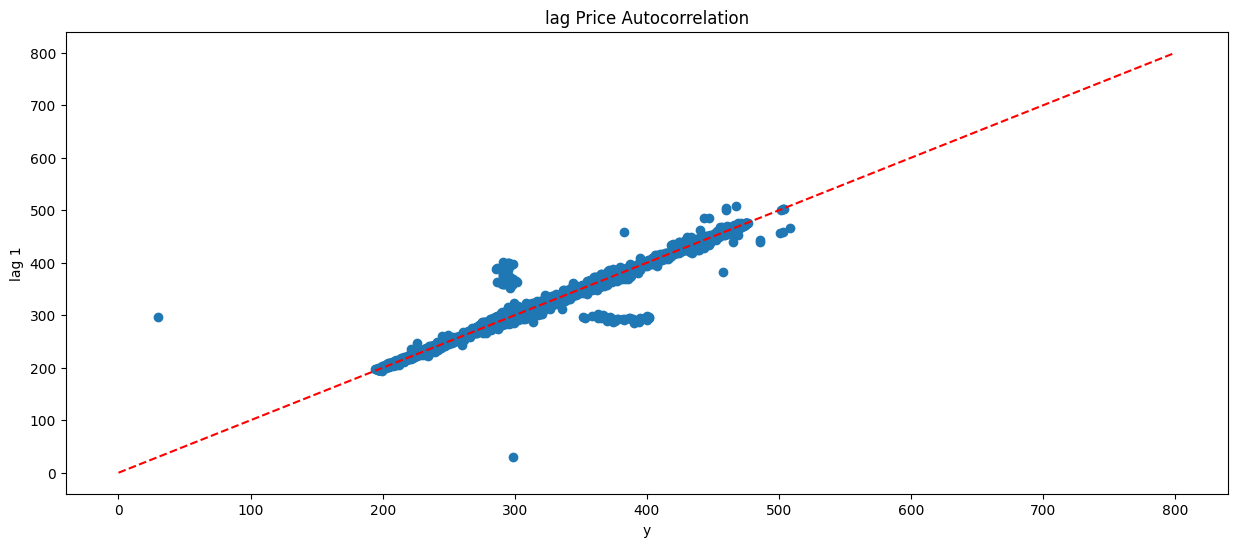

In [38]:
# Membuat visualisasi korelasi antara lag 0 dan lag 1
fig, ax = plt.subplots(figsize=(15, 6))
ax.scatter(x=df_reg["y"], y=df_reg["lag_1"])
ax.plot([0,800],[0,800],linestyle="--", color="red")
plt.xlabel("y")
plt.ylabel("lag 1")
plt.title("lag Price Autocorrelation");

#### Feature Engineering

In [39]:
# Split the data menjadi fitur dan target
target = "y"
y = df_reg[target]
X = df_reg.drop(columns= target)

#Split the data into train and test sets
cutoff = int(len(X) * 0.8)
X_train, y_train = X.iloc[:cutoff], y.iloc[:cutoff]
X_test, y_test = X.iloc[cutoff:], y.iloc[cutoff:]

<Axes: xlabel='Date'>

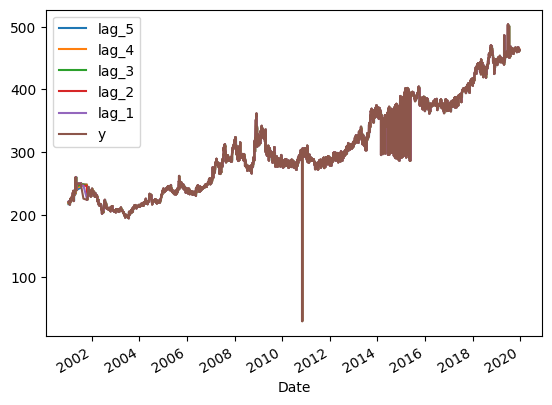

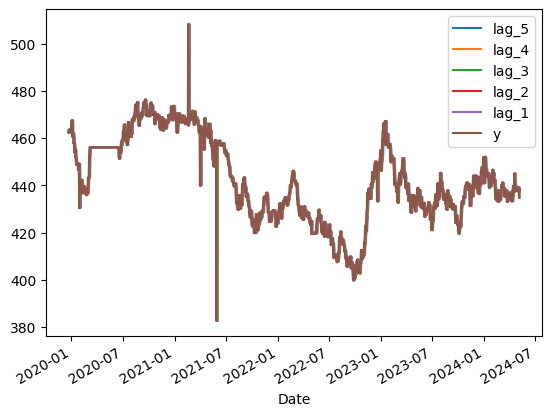

In [40]:
# Plotting data
df_reg[:len(X_train)].plot()
df_reg[len(X_train):].plot()

#### Model training

In [41]:
# Menentukan baseline MAE (persebaran nilai data)
y_pred_baseline = [y_train.mean()] * len(y_train)
mae_baseline = mean_absolute_error(y_train, y_pred_baseline)
print("Mean Close Prices:", round(y_train.mean(), 2))
print("Baseline MAE:", round(mae_baseline, 2))

Mean Close Prices: 313.26
Baseline MAE: 62.18


In [42]:
from sklearn.linear_model import LinearRegression
# Melakukan modeling
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [43]:
# Melihat hasil nilai MAE training dan test
training_mae = mean_absolute_error(y_train, model.predict(X_train))
test_mae = mean_absolute_error(y_test, model.predict(X_test))
print("Training MAE:", round(training_mae, 2))
print("Test MAE:", round(test_mae, 2))

Training MAE: 3.58
Test MAE: 1.94


In [44]:
# Membuat dataset perbandingan y_test dan y_pred
df_pred_test = pd.DataFrame(
             {
             "y_test": y_test,
             "y_pred": model.predict(X_test)
             }
)
df_pred_test.head()

,y_test,y_pred
Date,,
2019-12-21 23:58:00,462.6473,462.450621
2019-12-22 23:58:00,462.6473,462.280618
2019-12-23 23:58:00,463.0405,462.331723
2019-12-24 23:58:00,462.9740,462.525877
2019-12-25 23:58:00,462.5909,462.509704


In [45]:
import plotly.express as px
# Melakukan visualisasi data prediksi dengan data asli
fig = px.line(df_pred_test, labels= {"value": "Close Price"}, title = "Linear Regression Model: Actual Prices vs. Predicted Prices.")
fig.show()

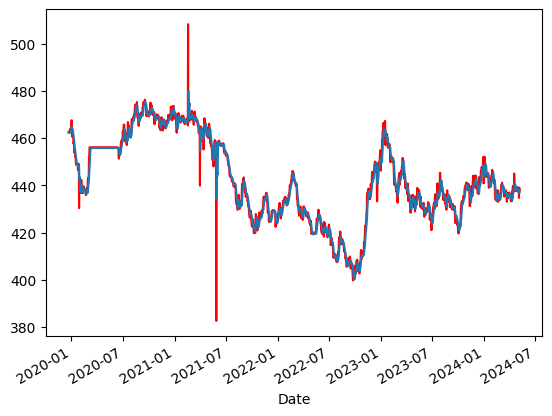

In [46]:
import matplotlib.pyplot as plt

df_pred_test['y_test'].plot(color='red')
plt.plot(df_pred_test['y_pred'])

In [47]:
# Check the MAE & RMSE
from sklearn.metrics import mean_absolute_error, mean_squared_error

print('MAE test  : ', mean_absolute_error(df_pred_test['y_test'], df_pred_test['y_pred']))
print('RMSE test : ', np.sqrt(mean_squared_error(df_pred_test['y_test'], df_pred_test['y_pred'])))

MAE test  :  1.9392400583043898
RMSE test :  3.4641453894050347


### LSTM

In [14]:
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import tensorflow as tf
import numpy as np
from tensorflow.keras.regularizers import L2
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

In [18]:
tf.random.set_seed(100)
tf.keras.backend.clear_session()

# Define the model_thb
model_thb = Sequential([
    LSTM(units=128, return_sequences=True, input_shape=(X_train.shape[1],1), kernel_regularizer=L2(0.001)),
    Dropout(0.2),
    LSTM(units=128, return_sequences=True, kernel_regularizer=L2(0.001)),
    Dropout(0.2),
    LSTM(units=128, kernel_regularizer=L2(0.001)),
    Dropout(0.2),
    Dense(units=64, activation='relu', kernel_regularizer=L2(0.001)),
    Dropout(0.2),
    Dense(units=1, kernel_regularizer=L2(0.001))
])

model_thb.compile(optimizer='adam', loss='mae', metrics=['mae']) # Notice the change here

# Display model_thb summary
model_thb.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 5, 128)            66560     
                                                                 
 dropout (Dropout)           (None, 5, 128)            0         
                                                                 
 lstm_1 (LSTM)               (None, 5, 128)            131584    
                                                                 
 dropout_1 (Dropout)         (None, 5, 128)            0         
                                                                 
 lstm_2 (LSTM)               (None, 128)               131584    
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense (Dense)               (None, 64)                8

In [19]:
history_thb = model_thb.fit(X_train, y_train, epochs= 100, batch_size= 32)

Epoch 1/100
200/200 [==============================] - 24s 42ms/step - loss: 167.6465 - mae: 167.2385
Epoch 2/100
200/200 [==============================] - 7s 33ms/step - loss: 65.6844 - mae: 65.2694
Epoch 3/100
200/200 [==============================] - 9s 43ms/step - loss: 65.1622 - mae: 64.7865
Epoch 4/100
200/200 [==============================] - 7s 36ms/step - loss: 66.0711 - mae: 65.7228
Epoch 5/100
200/200 [==============================] - 10s 50ms/step - loss: 65.3169 - mae: 64.9897
Epoch 6/100
200/200 [==============================] - 11s 54ms/step - loss: 65.5156 - mae: 65.2042
Epoch 7/100
200/200 [==============================] - 14s 71ms/step - loss: 65.7763 - mae: 65.4772
Epoch 8/100
200/200 [==============================] - 8s 40ms/step - loss: 58.0377 - mae: 57.7101
Epoch 9/100
200/200 [==============================] - 8s 40ms/step - loss: 30.1688 - mae: 29.6757
Epoch 10/100
200/200 [==============================] - 8s 42ms/step - loss: 28.1120 - mae: 27.5997
Epo

In [60]:
predictions = model_thb.predict(X_test)

50/50 [==============================] - 1s 21ms/step


In [61]:
print('MAE test  : ', mean_absolute_error(y_test, predictions))
print('RMSE test : ', np.sqrt(mean_squared_error(y_test, predictions)))

MAE test  :  17.1783624498944
RMSE test :  18.114368771276524


## Model Evaluation

### Finding Best Model

In [48]:
# Membuat dictionary untuk menyimpan hasil mae dan rmse dari data

all_reports = {}
def performance_report(all_reports, y_test, y_pred_test, name):
  score_reports = {
      'MAE test' : mean_absolute_error(y_test, y_pred_test),
      'RMSE test' : np.sqrt(mean_squared_error(y_test, y_pred_test)),
  }
  all_reports[name] = score_reports
  return all_reports

In [49]:
# Menambahkan hasil Logistic Regression ke dalam dictionary
all_reports = performance_report(all_reports, df_pred_test['y_test'], df_pred_test['y_pred'], 'Linear Regression')
pd.DataFrame(all_reports)

,Linear Regression
MAE test,1.939240
RMSE test,3.464145


In [50]:
# Menambahkan hasil Moving Average ke dalam dictionary
all_reports = performance_report(all_reports, test['Close'], predictions, 'Moving Average')
pd.DataFrame(all_reports)

,Linear Regression,Moving Average
MAE test,1.939240,3.793494
RMSE test,3.464145,11.392177


In [51]:
# Mengambil data untuk report arima
arima_report = all_dataset_with_pred.copy()
arima_report = arima_report.dropna(subset=['Close', 'Close_predict'])
arima_report

,Close,Close_predict,Close_forecast
2001-01-02 23:58:00,216.680011,0.000000,NaN
2001-01-03 23:58:00,218.265359,216.669001,NaN
2001-01-04 23:58:00,217.767019,217.557097,NaN
2001-01-05 23:58:00,219.481117,217.564613,NaN
2001-01-08 23:58:00,220.900392,218.247937,NaN
...,...,...,...
2024-04-30 23:58:00,437.378300,440.036053,NaN
2024-05-01 23:58:00,438.076500,438.232970,NaN
2024-05-02 23:58:00,437.751400,438.646319,NaN
2024-05-03 23:58:00,434.716900,438.475433,NaN


In [52]:
# Menambahkan hasil ARIMA ke dalam dictionary
all_reports = performance_report(all_reports, arima_report['Close'], arima_report['Close_predict'], 'ARIMA')
pd.DataFrame(all_reports)

,Linear Regression,Moving Average,ARIMA
MAE test,1.939240,3.793494,2.915077
RMSE test,3.464145,11.392177,7.051062


In [62]:
# Menambahkan hasil LSTM ke dalam dictionary
all_reports = performance_report(all_reports, y_test, predictions, 'LSTM')
pd.DataFrame(all_reports)

,Linear Regression,Moving Average,ARIMA,LSTM
MAE test,1.939240,3.793494,2.915077,17.178362
RMSE test,3.464145,11.392177,7.051062,18.114369


Dari hasil perbandingan nilai MAE dan RMSE, didapatkan model linear regression memiliki hasil terbaik. Hasil linear regression akan dilakukan analisis lanjutan.

### Further Analysis
Dilakukan perbandingan min dan max dari test set dengan hasil prediksi.

In [25]:
# Melihat data hasil
hasil = df_pred_test.copy()
hasil.head()

,y_test,y_pred
Date,,
2019-12-21 23:58:00,462.6473,462.450621
2019-12-22 23:58:00,462.6473,462.280618
2019-12-23 23:58:00,463.0405,462.331723
2019-12-24 23:58:00,462.9740,462.525877
2019-12-25 23:58:00,462.5909,462.509704


In [26]:
# Melihat min dan max dari data menggunakan describe
hasil.describe()

,y_test,y_pred
count,1598.000000,1598.000000
mean,442.512468,442.301237
std,17.820183,17.600117
min,382.513300,400.178131
25%,430.322375,430.122437
50%,439.814900,439.547466
75%,456.204400,455.913511
max,508.410900,480.130819


Dari hasil didapatkan stat sebagai berikut.

| Stat | Prediksi | Nilai asli
| --- | --- | --- |
| Min | 400.17 | 382.51 |
| Max | 480.13 | 508.41 |
| Median | 439.54 | 439.81 |
| Mean | 442.30 | 442.51 |

Dapat terlihat bahwa terdapat beberapa insight : <br>
1. Hasil prediksi memiliki median dan mean yang cenderung relatif mirip dengan nilai asli.
2. Nilai prediksi memiliki batas minimum yang lebih tinggi namun memiliki nilai max yang lebih rendah.

Untuk melihat jumlah data yang termasuk ke dalam kategori dapat dilakukan analisis lebih lanjut.

In [27]:
# Melakukan perhitunga jumlah data dimana y_pred < y_test asli
jum_lower_data = hasil[(hasil['y_pred']<hasil['y_test'])].count()
print(f"Jumlah data y_pred lebih kecil dari y_test asli adalah {jum_lower_data[0]}")
print("Keseluruhan jumlah data adalah ", len(hasil))
print("Persentase jumlah data lebih kecil adalah ", (jum_lower_data[0]/len(hasil))*100, "%")

Jumlah data y_pred lebih kecil dari y_test asli adalah 889
Keseluruhan jumlah data adalah  1598
Persentase jumlah data lebih kecil adalah  55.63204005006258 %


Jika dilihat melalui analisis lebih lanjut, terlihat bahwa data y_pred yang lebih kecil dari y_test sebanyak 55%. Hal ini mengindikasikan bahwa 45% sisanya memprediksikan hasil yang lebih tinggi. Oleh karena itu, dapat terlihat bahwa **model memprediksikan data dengan kecenderungan lebih rendah dari y_test**.

In [28]:
# Melakukan pengecekan terkait asumsi prediksi > y_test
jum_higher_data = hasil[(hasil['y_pred']>hasil['y_test'])].count()
print(f"Jumlah data y_pred lebih besar dari y_test asli adalah {jum_higher_data[0]}")
print("Keseluruhan jumlah data adalah ", len(hasil))
print("Persentase jumlah data lebih kecil adalah ", (jum_higher_data[0]/len(hasil))*100, "%")

Jumlah data y_pred lebih besar dari y_test asli adalah 709
Keseluruhan jumlah data adalah  1598
Persentase jumlah data lebih kecil adalah  44.36795994993742 %


Dari hasil eksplorasi didapatkan bahwa asumsi tersebut terbukti benar.

## Model Saving

In [76]:
# Melakukan penyimpanan model regreasi linear sebagai pickle file
model_pkl_file = "bea_cukai_thb_linreg.pkl"

with open(model_pkl_file, 'wb') as file:
    pickle.dump(model, file)

## Model Inference

In [49]:
from datetime import datetime

def forecasting(day):
  kurs_forecast = df_thb.copy()
  window=5
  for i in range(day):
    temp_X = pd.DataFrame(kurs_forecast[-window:].values.reshape(1,-1))
    new_idx = datetime(kurs_forecast.index.year[-1],kurs_forecast.index.month[-1],kurs_forecast.index.day[-1]+1)
    # Forecast
    kurs_forecast.loc[new_idx] = model.predict(temp_X)
  return kurs_forecast

In [128]:
# Forecast data for the next 2 weeks
forecasting(2)

,Close
Date,
2001-01-02 23:58:00,216.680011
2001-01-03 23:58:00,218.265359
2001-01-04 23:58:00,217.767019
2001-01-05 23:58:00,219.481117
2001-01-08 23:58:00,220.900392
...,...
2024-05-03 23:58:00,434.716900
2024-05-04 23:58:00,439.074100
2024-05-05 23:58:00,438.148700


<Axes: xlabel='Date'>

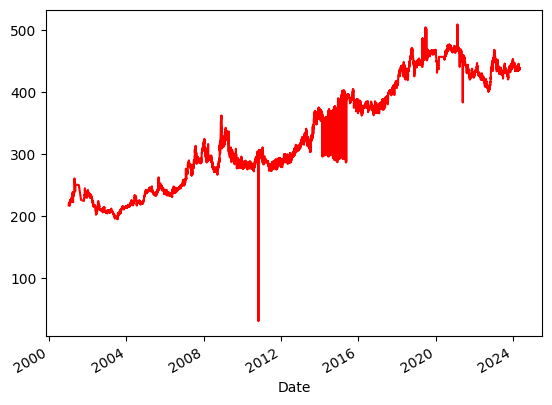

In [51]:
import matplotlib.pyplot as plt

kurs_forecast['Close'].plot(color='red')

### Export function

In [127]:
# Exporting the related functions
%%writefile linreg_predict.py
# Import library
from datetime import datetime
import pandas as pd

def forecasting(data, model, day):
  kurs_forecast = data.copy()
  window=5
  for i in range(day):
    temp_X = pd.DataFrame(kurs_forecast[-window:].values.reshape(1,-1))
    new_idx = datetime(kurs_forecast.index.year[-1],kurs_forecast.index.month[-1],kurs_forecast.index.day[-1]+1)
    # Forecast
    kurs_forecast.loc[new_idx] = model.predict(temp_X)
  return kurs_forecast

Writing linreg_predict.py


## Conclusion
Dengan objektif untuk membuat kalkulator untuk pajak bea cukai dengan prediksi pada kurs, didapatkan bahwa model Linear Regression merupakan model terbaik untuk memprediksi kurs THB.